In [41]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import Counter

In [49]:
filePath = os.getcwd() + '/Data/annotations/cleaned_ingredients.txt'
ingredients = []
tot = 0

In [50]:
with open(filePath) as dataset:
    line = dataset.readline().strip()
    
    while line:
        ingredients.extend(line.split(','))
        tot += 1
        
        line = dataset.readline().strip()
        
count = dict(Counter(ingredients))

In [52]:
df = pd.DataFrame.from_dict(count, orient = 'index', columns = ['count'])
top20Ingred = df.sort_values(by = 'count', ascending = False).iloc[: 20]  # top 20

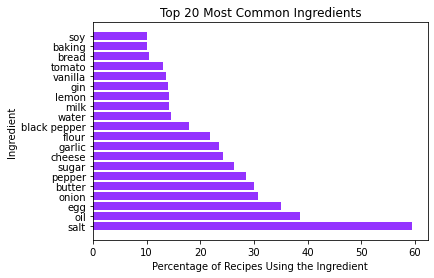

In [57]:
plt.barh(top20Ingred.index, (top20Ingred['count'] / tot) * 100, color = '#9433ff')
plt.title('Top 20 Most Common Ingredients')
plt.ylabel('Ingredient')
plt.xlabel('Percentage of Recipes Using the Ingredient')
plt.show()